In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Data-preproceeing

In [ ]:
#read data set
df1=pd.read_csv('../../data/raw/wwlLancMsc_data.csv',dtype={'covid19_diagnosis_description': 'string'})

In [5]:
df1.shape

(41846, 101)

In [7]:
s3=df1.iloc[:,60:80]
s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   comorbidity_acute_myocardial_infarction_flag   41846 non-null  int64
 1   comorbidity_cancer_flag                        41846 non-null  int64
 2   comorbidity_cerebral_vascular_accident_flag    41846 non-null  int64
 3   comorbidity_dementia_flag                      41846 non-null  int64
 4   comorbidity_congestive_heart_failure_flag      41846 non-null  int64
 5   comorbidity_conncective_tissue_disorder_flag   41846 non-null  int64
 6   comorbidity_diabetes_complications_flag        41846 non-null  int64
 7   comorbidity_diabetes_flag                      41846 non-null  int64
 8   comorbidity_hiv_flag                           41846 non-null  int64
 9   comorbidity_liver_disease_flag                 41846 non-null  int64
 10

## summary 
- there are 19 variables are binary variables. The variables describe patients'comorbidity and chronic condition. yes(1) no(0)
- In order to get the overview of them, I used stack bar chart to check the the percentage of yes and no. I found that **chronic_condition_cardiovascular_disease_flag** and **chronic_condition_hypertension_flag** have largest percentage of 'yes' among 19 variables
- I then exlpore the correlation of the 19 variables with Chi square and Phi cofficient, in the data set, Chi square results doesn't give a reliable result, however, Phi cofficient provide a clear correlation relationship and can be explained by domain knowledge


## Check the data type and distrbution of 20 variables


**they are all binary variable there is no missing values**

In [13]:
s3.nunique()

comorbidity_acute_myocardial_infarction_flag     2
comorbidity_cancer_flag                          2
comorbidity_cerebral_vascular_accident_flag      2
comorbidity_dementia_flag                        2
comorbidity_congestive_heart_failure_flag        2
comorbidity_conncective_tissue_disorder_flag     2
comorbidity_diabetes_complications_flag          2
comorbidity_diabetes_flag                        2
comorbidity_hiv_flag                             2
comorbidity_liver_disease_flag                   2
comorbidity_metastatic_cancer_flag               2
comorbidity_paraplegia_flag                      2
comorbidity_peptic_ulcer_flag                    2
comorbidity_peripheral_vascular_disease_flag     2
comorbidity_pulmonary_disease_flag               2
comorbidity_renal_disease_flag                   2
comorbidity_severe_liver_disease_flag            2
chronic_condition_asthma_flag                    2
chronic_condition_diabetes_flag                  2
chronic_condition_cardiovascula

In [14]:
s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   comorbidity_acute_myocardial_infarction_flag   41846 non-null  int64
 1   comorbidity_cancer_flag                        41846 non-null  int64
 2   comorbidity_cerebral_vascular_accident_flag    41846 non-null  int64
 3   comorbidity_dementia_flag                      41846 non-null  int64
 4   comorbidity_congestive_heart_failure_flag      41846 non-null  int64
 5   comorbidity_conncective_tissue_disorder_flag   41846 non-null  int64
 6   comorbidity_diabetes_complications_flag        41846 non-null  int64
 7   comorbidity_diabetes_flag                      41846 non-null  int64
 8   comorbidity_hiv_flag                           41846 non-null  int64
 9   comorbidity_liver_disease_flag                 41846 non-null  int64
 10

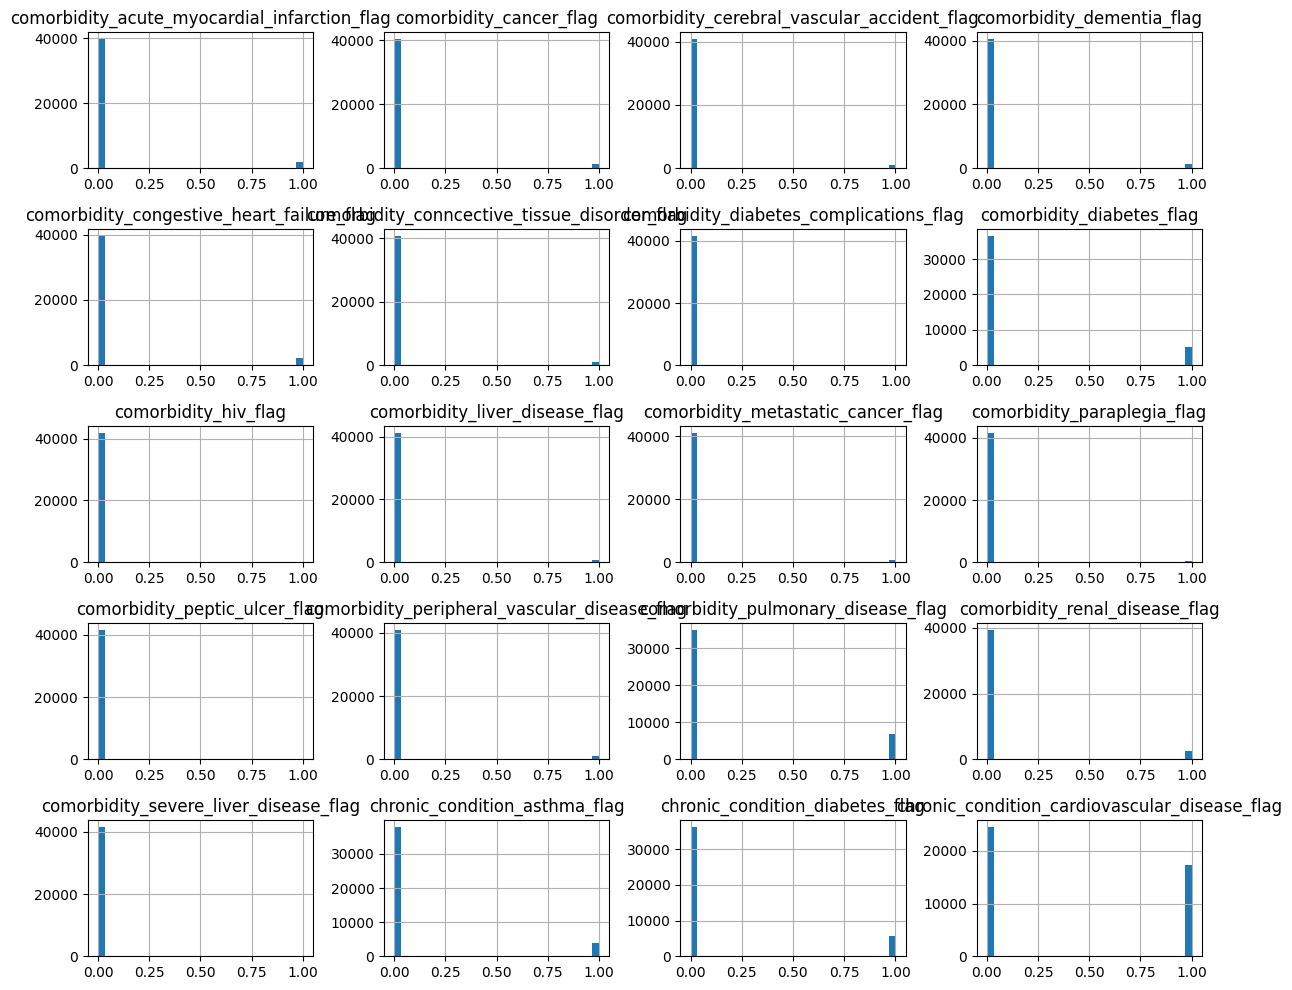

In [15]:
s3.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

In [17]:
binary_percetage=df1.iloc[:,60:79].apply(lambda x: x.value_counts(normalize=True)).T
binary_percetage=binary_percetage.reset_index().rename(columns={'index':'features'})

<Axes: title={'center': 'Percentage of 1 and 0'}, xlabel='features'>

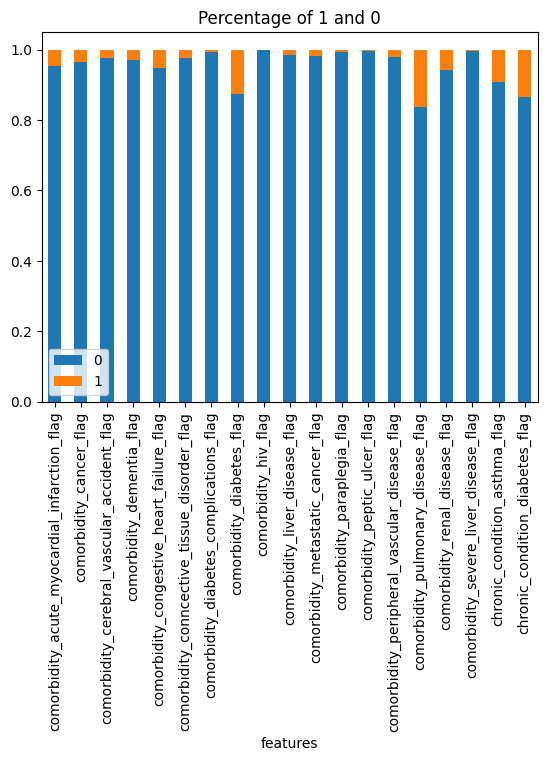

In [18]:
binary_percetage.plot(x='features',kind='bar',stacked=True,title='Percentage of 1 and 0')


## check if there are duplicated columns

In [20]:
from feature_engine.selection import DropDuplicateFeatures

In [22]:
#check duplicate columns，there is no duplicated variables
transformer=DropDuplicateFeatures()
transformer.fit(s3)

,variables,None
,missing_values,'ignore'
,confirm_variables,False


In [23]:
transformer.features_to_drop_

set()

## Check the correlation relationship between the variables

In [37]:
from scipy.stats import chi2_contingency

#check the correlation relationship between the 20 variables by  φ (Phi)

def phi_matrix(df):
    n = len(df.columns)
    arr = np.zeros((n, n))
    
    for n1, i in enumerate(df.columns):
        for n2, j in enumerate(df.columns):
            if i == j:
                arr[n1, n2] = np.nan
                continue
            
            table = pd.crosstab(df[i], df[j])
            chi2, p, dof, expected = chi2_contingency(table)
            n_total = table.values.sum()
            phi = np.sqrt(chi2 / n_total)
            if abs(phi)<0.6:
                arr[n1, n2] = np.nan
                continue
            arr[n1, n2] = phi
    
    df_phi = pd.DataFrame(arr, index=df.columns, columns=df.columns)
    return df_phi


**we have three pairs of Highly correlated variables**

| pair | phi | |
|:--:|:--|:--|
|[comorbidity_diabetes_flag,chronic_condition_diabetes_flag] | 0.964| 
|[comorbidity_pulmonary_disease_flag,chronic_condition_asthma_flag]| 0.692 |
|[chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag]| 0.7679|


In [39]:
#NaN means the phi is lower than 0.6 which is not considered as highly correlated variables
df_phi=phi_matrix(df1.iloc[:,60:83])
df_phi

,comorbidity_acute_myocardial_infarction_flag,comorbidity_cancer_flag,comorbidity_cerebral_vascular_accident_flag,comorbidity_dementia_flag,comorbidity_congestive_heart_failure_flag,comorbidity_conncective_tissue_disorder_flag,comorbidity_diabetes_complications_flag,comorbidity_diabetes_flag,comorbidity_hiv_flag,comorbidity_liver_disease_flag,...,comorbidity_peripheral_vascular_disease_flag,comorbidity_pulmonary_disease_flag,comorbidity_renal_disease_flag,comorbidity_severe_liver_disease_flag,chronic_condition_asthma_flag,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag
comorbidity_acute_myocardial_infarction_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_cancer_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_cerebral_vascular_accident_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_dementia_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_congestive_heart_failure_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_conncective_tissue_disorder_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_diabetes_complications_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_diabetes_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.964465,NaN,NaN,NaN,NaN
comorbidity_hiv_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comorbidity_liver_disease_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
to_drop=['chronic_condition_diabetes_flag',
'comorbidity_pulmonary_disease_flag']
df_dropped=s3.drop(to_drop,axis=1)

In [ ]:
df_dropped.to_csv('../../data/processed/merge_Xiaomei_60_80_cleaned.csv')

In [14]:
df_dropped.columns

Index(['comorbidity_acute_myocardial_infarction_flag',
       'comorbidity_cancer_flag',
       'comorbidity_cerebral_vascular_accident_flag',
       'comorbidity_dementia_flag',
       'comorbidity_congestive_heart_failure_flag',
       'comorbidity_conncective_tissue_disorder_flag',
       'comorbidity_diabetes_complications_flag', 'comorbidity_diabetes_flag',
       'comorbidity_hiv_flag', 'comorbidity_liver_disease_flag',
       'comorbidity_metastatic_cancer_flag', 'comorbidity_paraplegia_flag',
       'comorbidity_peptic_ulcer_flag',
       'comorbidity_peripheral_vascular_disease_flag',
       'comorbidity_renal_disease_flag',
       'comorbidity_severe_liver_disease_flag',
       'chronic_condition_asthma_flag',
       'chronic_condition_cardiovascular_disease_flag'],
      dtype='object')

## Transform the target variable

**Summary**
- from Figure 1, we can see that target variable are highly right-skewed, there are some extrem events. clips y by capping all values above its 99th percentile to that percentile value (627) to handle the extrem cases. There are 421 cases be capped by the with percentile value.
- The percentage of capping data points are 1%, which can be considered as outliers
- After clip the target variable, so I transform target variable by the log1p method. It is can be seen that the y tend to be less skewed and there is no right long tails. It significantly improve the model perfermance

In [25]:
import seaborn as sns

In [32]:
df1['spell_los_hrs'].describe()

count    41846.000000
mean        49.672466
std        135.309950
min          0.000000
25%          3.000000
50%          6.000000
75%         34.000000
max       3022.000000
Name: spell_los_hrs, dtype: float64

Text(0.5, 1.0, 'Figure1: Histogram of target variable')

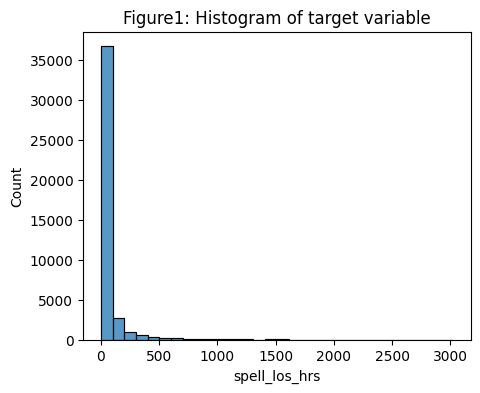

In [31]:
plt.figure(figsize=(5,4))
sns.histplot(df1['spell_los_hrs'], bins=30)
plt.title('Figure1: Histogram of target variable')

In [37]:
# capping all values above its 99th percentile to that percentile value
y_clip = np.clip(df1['spell_los_hrs'], None, df1['spell_los_hrs'].quantile(0.99))
y_clip.describe()

count    41846.000000
mean        46.140539
std        106.196763
min          0.000000
25%          3.000000
50%          6.000000
75%         34.000000
max        672.000000
Name: spell_los_hrs, dtype: float64

In [46]:
print(f'Total samples:{s3.shape[0]}\ncapping data point: {(y_clip==672).sum()}\ncapping percentage:{round((y_clip==672).sum()/s3.shape[0]*100,2)}%')

Total samples:41846
capping data point: 421
capping percentage:1.01%


Text(0.5, 1.0, 'Figure1: Histogram of target variable (log1p transformation)')

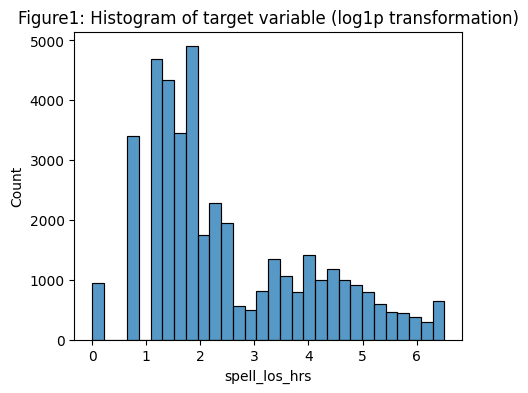

In [50]:
import numpy as np
y_clip = np.clip(df1['spell_los_hrs'], None, df1['spell_los_hrs'].quantile(0.99))
y_clip.describe()
y_transformed=np.log1p(y_clip)
plt.figure(figsize=(5,4))
sns.histplot(y_transformed, bins=30)
plt.title('Figure1: Histogram of target variable (log1p transformation)')